In [50]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
import pandas as pd

# Load your data
df = pd.read_csv("monthly_formatted_output.csv")  # replace with your path

# Convert 'Report Month' to datetime
df['Report Month'] = pd.to_datetime(df['Report Month'])

# --- Function to clean and convert numeric columns ---
def clean_and_convert_to_numeric(column):
    return pd.to_numeric(
        column.astype(str)
              .str.replace('%', '', regex=False)
              .str.replace(',', '', regex=False)
              .str.extract(r'(\d+\.?\d*)')[0],  # extract numeric part
        errors='coerce'
    )

# Display missing values per column, sorted in descending order
missing_values = df.isnull().sum().sort_values(ascending=False)

# Show only columns that have missing values
missing_values = missing_values[missing_values > 0]

# Display result
print("Missing Values by Column:\n")
print(missing_values)

Missing Values by Column:

FWC - Average School Attendance Rate                                                         20
HOME-STAT clients placed into permanent housing, transitional housing, and other settings    12
SA Race/Ethnicity HoH - Native American                                                       1
dtype: int64


In [52]:
# Columns to process
col_attendance = 'FWC - Average School Attendance Rate'
col_homestat   = 'HOME-STAT clients placed into permanent housing, transitional housing, and other settings'
col_native     = 'SA Race/Ethnicity HoH - Native American'

# Clean and fill each column differently

# Clean and fill attendance with median
df[col_attendance] = clean_and_convert_to_numeric(df[col_attendance])
df[col_attendance] = df[col_attendance].fillna(df[col_attendance].median())

# Clean and forward-fill HOME-STAT column
df[col_homestat] = clean_and_convert_to_numeric(df[col_homestat])
df[col_homestat] = df[col_homestat].fillna(method='ffill')

# Fill Native American race column with mode
if df[col_native].isnull().any():
    df[col_native] = df[col_native].fillna(df[col_native].mode()[0])

# Display missing after
print("\n✅ Missing Values AFTER Filling:\n")
print(df[[col_attendance, col_homestat, col_native]].isnull().sum())


✅ Missing Values AFTER Filling:

FWC - Average School Attendance Rate                                                         0
HOME-STAT clients placed into permanent housing, transitional housing, and other settings    0
SA Race/Ethnicity HoH - Native American                                                      0
dtype: int64


<ipython-input-52-eb4b2d1c1dce>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col_homestat] = df[col_homestat].fillna(method='ffill')


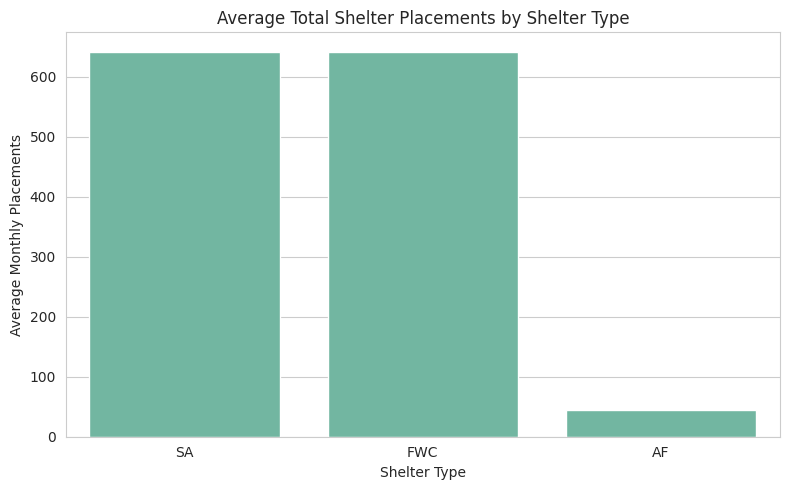

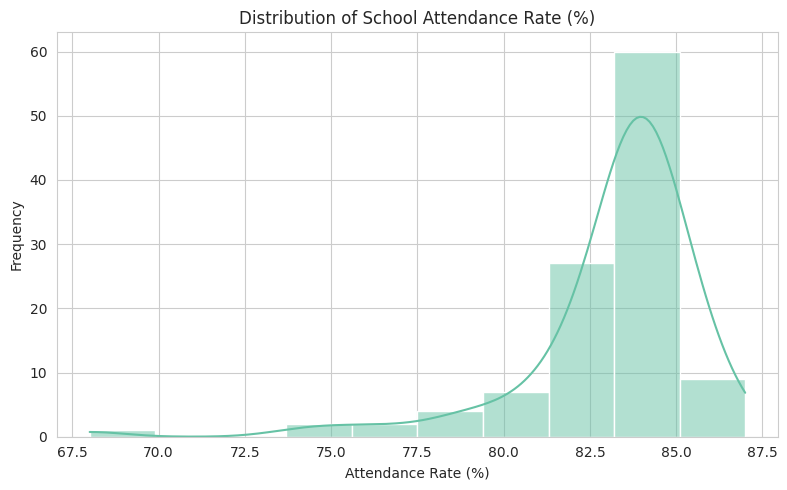

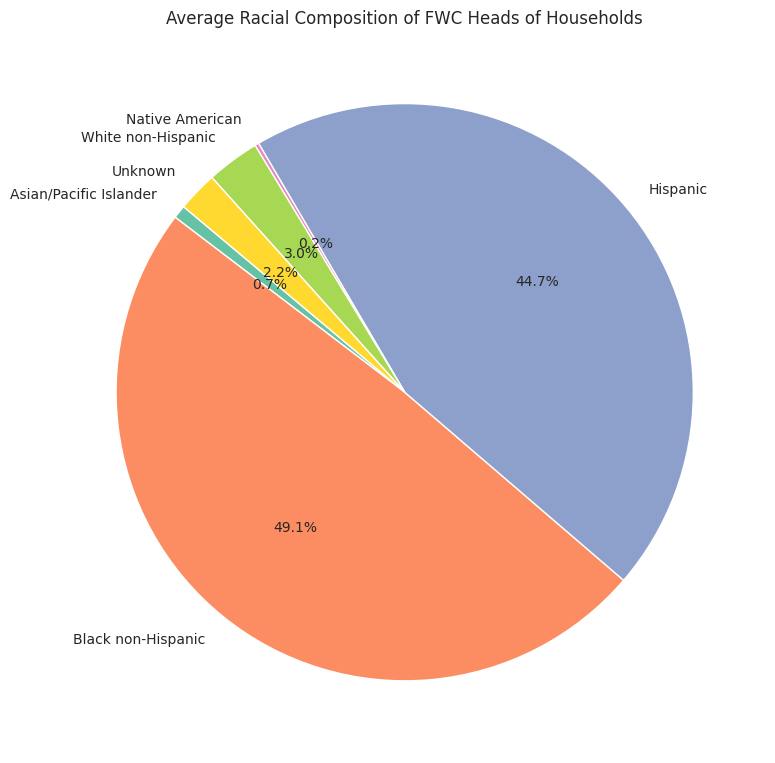

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("monthly_formatted_output.csv")  # Replace with your actual path
df['Report Month'] = pd.to_datetime(df['Report Month'])

# Helper function to clean numeric-looking strings
def clean_and_convert_to_numeric(column):
    return pd.to_numeric(
        column.astype(str)
              .str.replace('%', '', regex=False)
              .str.replace(',', '', regex=False)
              .str.extract(r'(\d+\.?\d*)')[0],
        errors='coerce'
    )

# Clean and convert specific columns
df['FWC - Average School Attendance Rate'] = clean_and_convert_to_numeric(
    df['FWC - Average School Attendance Rate'])

df['HOME-STAT clients placed into permanent housing, transitional housing, and other settings'] = clean_and_convert_to_numeric(
    df['HOME-STAT clients placed into permanent housing, transitional housing, and other settings'])

# Fill missing values (Future-proofed assignments)
df['FWC - Average School Attendance Rate'] = df['FWC - Average School Attendance Rate'].fillna(
    df['FWC - Average School Attendance Rate'].median()
)

df['HOME-STAT clients placed into permanent housing, transitional housing, and other settings'] = df[
    'HOME-STAT clients placed into permanent housing, transitional housing, and other settings'
].ffill()

df['SA Race/Ethnicity HoH - Native American'] = df['SA Race/Ethnicity HoH - Native American'].fillna(
    df['SA Race/Ethnicity HoH - Native American'].mode()[0]
)

# --- 1. Bar Graph: Average Shelter Placements by Type ---
placement_cols = [
    'fwc_total_shelter_placements',
    'af_total_shelter_placements',
    'sa_total_shelter_placements'
]
placement_avg = df[placement_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=placement_avg.index.str.replace('_total_shelter_placements', '').str.upper(), y=placement_avg.values)
plt.title("Average Total Shelter Placements by Shelter Type")
plt.ylabel("Average Monthly Placements")
plt.xlabel("Shelter Type")
plt.tight_layout()
plt.show()

# --- 2. Histogram: Distribution of School Attendance Rate ---
plt.figure(figsize=(8, 5))
sns.histplot(df['FWC - Average School Attendance Rate'], bins=10, kde=True)
plt.title("Distribution of School Attendance Rate (%)")
plt.xlabel("Attendance Rate (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- 3. Pie Chart: Racial Composition of FWC Heads of Households ---
race_columns = [col for col in df.columns if "FWC Race/Ethnicity HoH" in col and "Total" not in col]
fwc_race_pie = df[race_columns].mean()

plt.figure(figsize=(8, 8))
plt.pie(fwc_race_pie,
        labels=fwc_race_pie.index.str.replace("FWC Race/Ethnicity HoH - ", ""),
        autopct='%1.1f%%',
        startangle=140)
plt.title("Average Racial Composition of FWC Heads of Households")
plt.tight_layout()
plt.show()


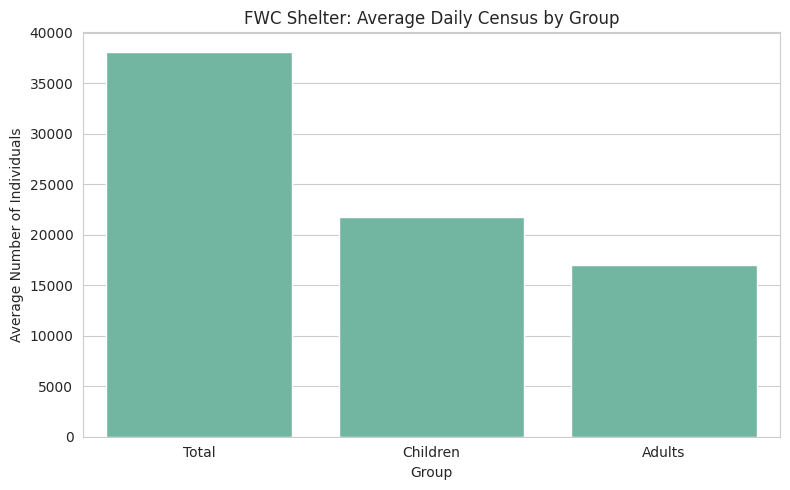

In [54]:
#Set color theme
sns.set_palette("Set2")
sns.set_style("whitegrid")

# Bar Graph: FWC Shelter Census by Group ---
fwc_census_cols = [
    'FWC Avg Daily census Individual in Shelter - Adults',
    'FWC Avg Daily census Individual in Shelter - Children',
    'FWC Avg Daily census Individual in Shelter - Total'
]
fwc_census_avg = df[fwc_census_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=fwc_census_avg.index.str.replace('FWC Avg Daily census Individual in Shelter - ', ''),
    y=fwc_census_avg.values
)
plt.title("FWC Shelter: Average Daily Census by Group")
plt.ylabel("Average Number of Individuals")
plt.xlabel("Group")
plt.tight_layout()
plt.show()

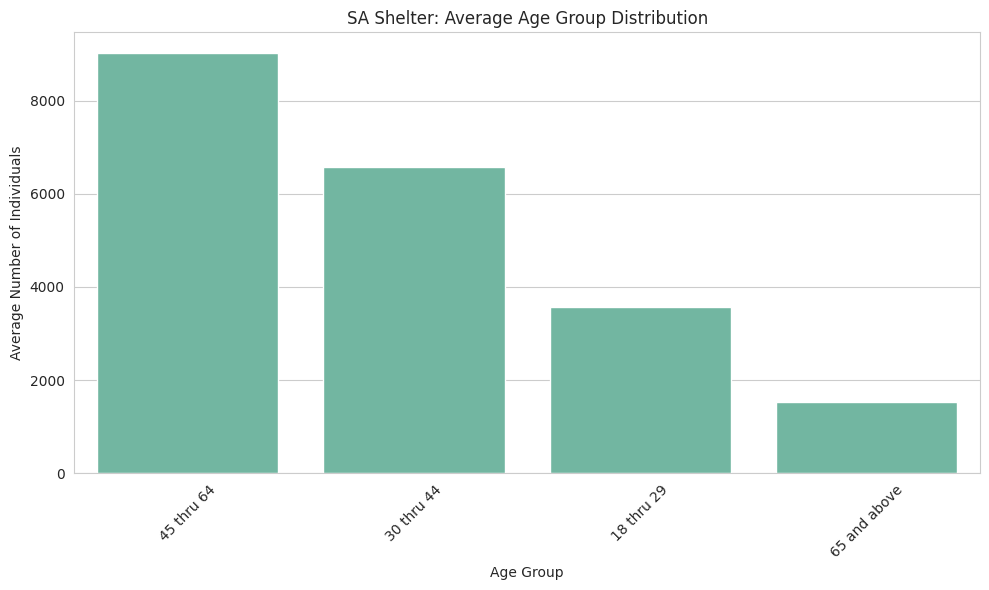

In [55]:
#Bar Graph: SA Shelter Age Distribution ---
age_sa_cols = [col for col in df.columns if "SA Unique Individuals by Age" in col and "Total" not in col]
age_sa_avg = df[age_sa_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=age_sa_avg.index.str.replace("SA Unique Individuals by Age - ", ""),
    y=age_sa_avg.values
)
plt.title("SA Shelter: Average Age Group Distribution")
plt.ylabel("Average Number of Individuals")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-56-dcad8fdfa702>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


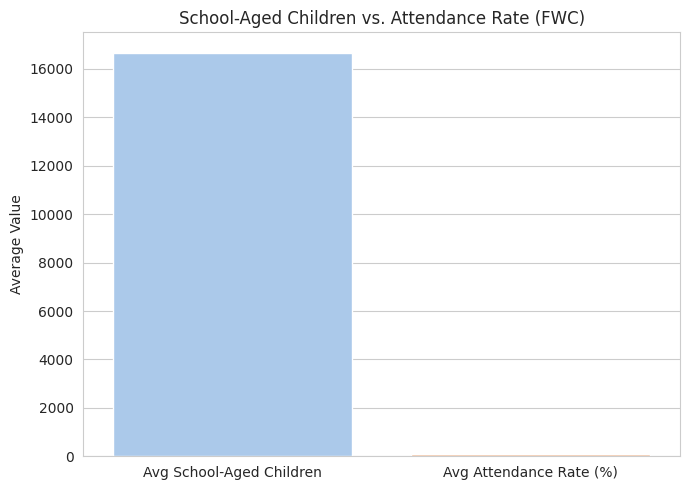

In [56]:
# Bar Graph: School-Aged Children vs Attendance ---
plt.figure(figsize=(7, 5))
sns.barplot(
    x=["Avg School-Aged Children", "Avg Attendance Rate (%)"],
    y=[
        df['FWC - Number of School-Aged Children'].mean(),
        df['FWC - Average School Attendance Rate'].mean()
    ],
    palette="pastel"
)
plt.title("School-Aged Children vs. Attendance Rate (FWC)")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X = your selected features


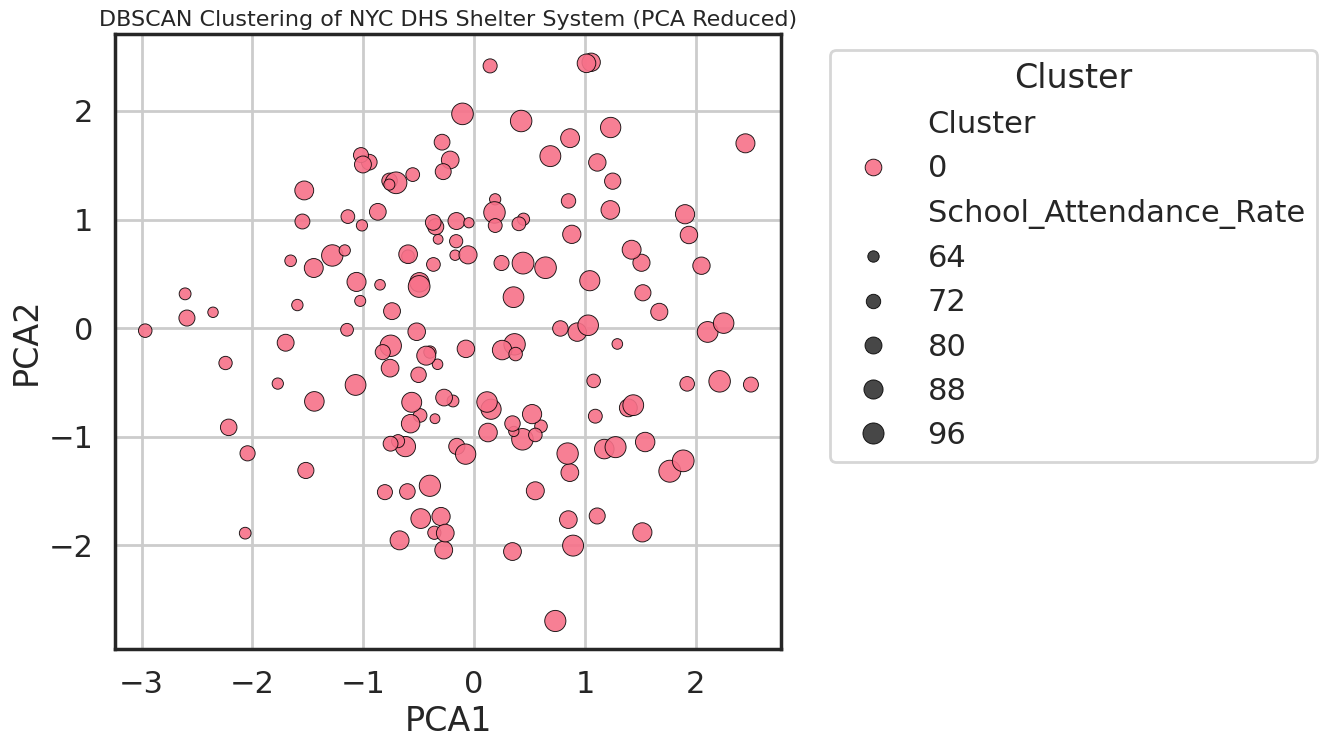

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Simulate dataset (similar to NYC DHS shelter data)
np.random.seed(42)
n_samples = 150
data = pd.DataFrame({
    'Adults_Shelter': np.random.randint(500, 2000, n_samples),
    'Children_Shelter': np.random.randint(200, 1500, n_samples),
    'Total_Shelter': np.random.randint(1000, 3000, n_samples),
    'School_Attendance_Rate': np.random.uniform(60, 100, n_samples),
    'Shelter_Exits': np.random.randint(50, 300, n_samples),
    'School_Aged_Children': np.random.randint(50, 800, n_samples),
    'Homebase_Enrollments': np.random.randint(100, 500, n_samples)
})

# Feature selection
features = data[['Adults_Shelter', 'Children_Shelter', 'Total_Shelter',
                 'School_Attendance_Rate', 'Shelter_Exits', 'School_Aged_Children',
                 'Homebase_Enrollments']]

# Standardize features
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
data['Cluster'] = dbscan.fit_predict(pca_result)

# Assign colors
unique_clusters = np.sort(data['Cluster'].unique())
palette = sns.color_palette('husl', len(unique_clusters))
cluster_color_map = {label: palette[i] for i, label in enumerate(unique_clusters)}

# Plot DBSCAN result
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=data,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette=cluster_color_map,
    style='Cluster',
    size='School_Attendance_Rate',
    sizes=(50, 250),
    alpha=0.9,
    edgecolor='black'
)

plt.title('DBSCAN Clustering of NYC DHS Shelter System (PCA Reduced)', fontsize=16)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


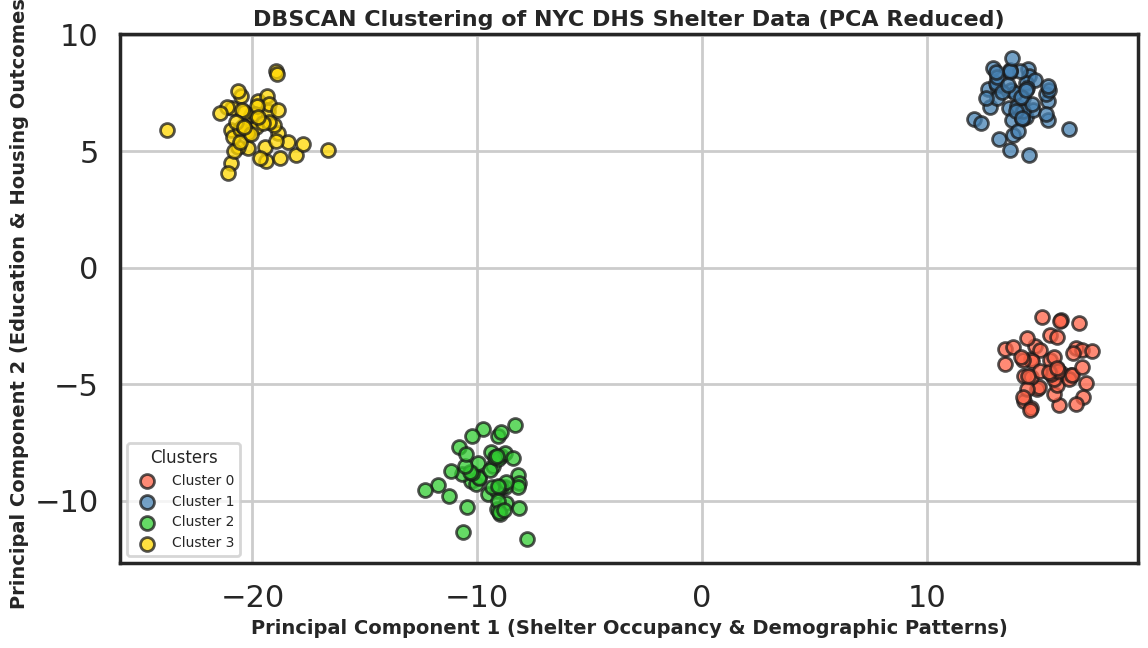

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Simulate dataset
X, _ = make_blobs(n_samples=200, centers=4, n_features=10, random_state=42)

# PCA dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=2.5, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

# Colors for clusters
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#800080', '#00CED1', '#FF1493', '#FFA500']
unique_clusters = np.unique(clusters)
color_map = {cluster: colors[i % len(colors)] for i, cluster in enumerate(unique_clusters)}

# Plotting
plt.figure(figsize=(12, 7))
for cluster in unique_clusters:
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1],
                c=color_map[cluster], label=f'Cluster {cluster}' if cluster != -1 else 'Noise',
                s=100, alpha=0.75, edgecolor='k')

# Title and labeled axes
plt.title('DBSCAN Clustering of NYC DHS Shelter Data (PCA Reduced)', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1 (Shelter Occupancy & Demographic Patterns)', fontsize=14, fontweight='bold')
plt.ylabel('Principal Component 2 (Education & Housing Outcomes)', fontsize=14, fontweight='bold')

# Additional plot details
plt.legend(title='Clusters', fontsize=10, title_fontsize='12')
plt.grid(True)
plt.tight_layout()
plt.show()

Silhouette Score: 0.88


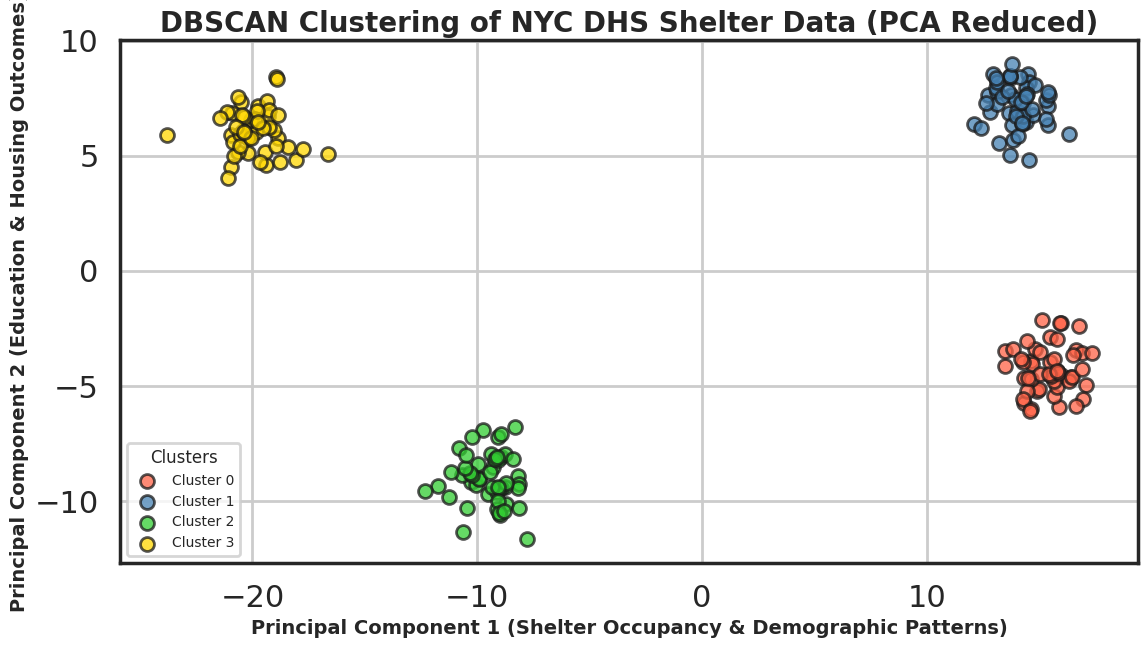

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Simulate dataset
X, _ = make_blobs(n_samples=200, centers=4, n_features=10, random_state=42)

# PCA dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=2.5, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

# Silhouette Score Calculation
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Colors for clusters
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#800080', '#00CED1', '#FF1493', '#FFA500']
unique_clusters = np.unique(clusters)
color_map = {cluster: colors[i % len(colors)] for i, cluster in enumerate(unique_clusters)}

# Plotting
plt.figure(figsize=(12, 7))
for cluster in unique_clusters:
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1],
                c=color_map[cluster], label=f'Cluster {cluster}' if cluster != -1 else 'Noise',
                s=100, alpha=0.75, edgecolor='k')

# Title and labeled axes
plt.title('DBSCAN Clustering of NYC DHS Shelter Data (PCA Reduced)', fontsize=20, fontweight='bold')
plt.xlabel('Principal Component 1 (Shelter Occupancy & Demographic Patterns)', fontsize=14, fontweight='bold')
plt.ylabel('Principal Component 2 (Education & Housing Outcomes)', fontsize=14, fontweight='bold')

# Additional plot details
plt.legend(title='Clusters', fontsize=10, title_fontsize='12')
plt.grid(True)
plt.tight_layout()
plt.show()


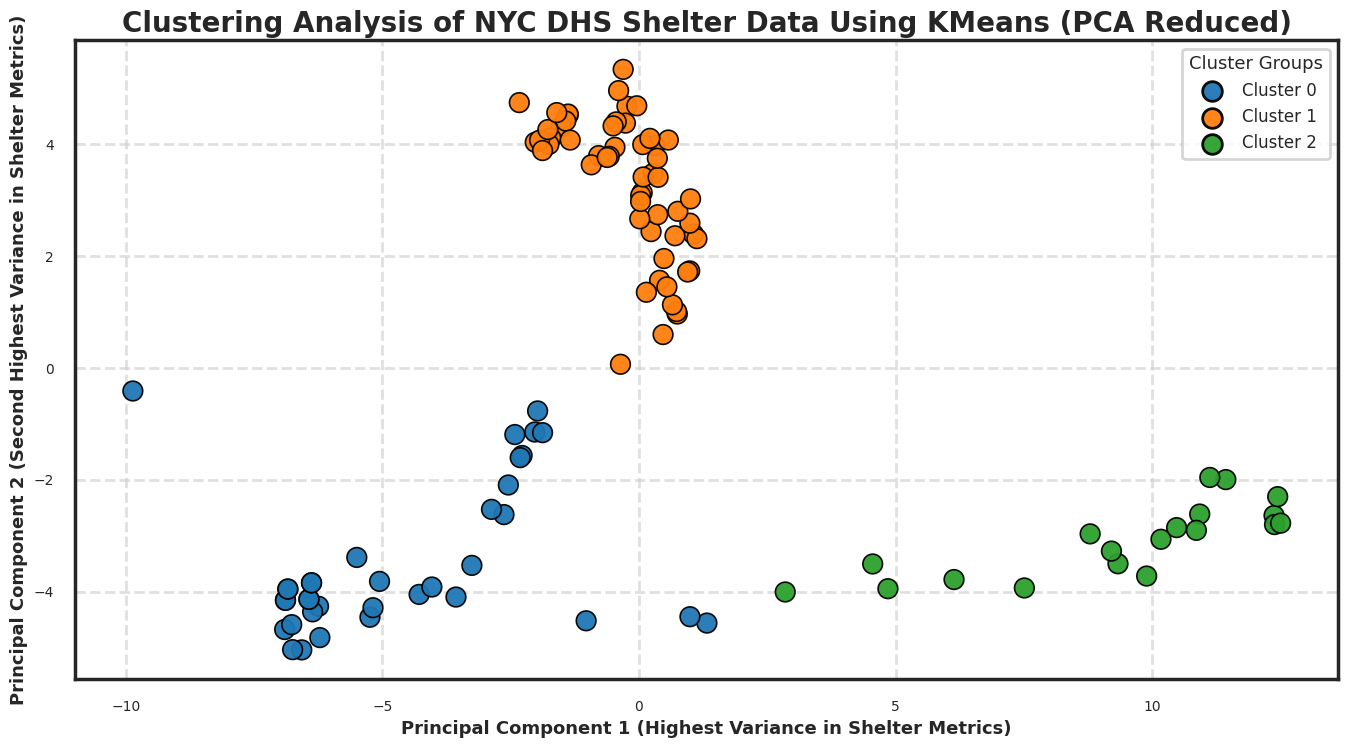

In [77]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'monthly_formatted_output.csv'  # Adjust if needed
df = pd.read_csv(file_path)

# Keep only numeric data
df_numeric = df.select_dtypes(include=['number']).dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Set styling
sns.set(style="white", context='poster')
palette_vibrant = sns.color_palette("tab10", n_colors=3)
colors_vibrant = [palette_vibrant[label] for label in kmeans_labels]

# Create the plot
plt.figure(figsize=(14, 8))
plt.scatter(
    pca_components[:, 0], pca_components[:, 1],
    c=colors_vibrant,
    s=200,
    edgecolors='black',
    linewidth=1.2,
    alpha=0.95
)

# Add labels and title
plt.title('Clustering Analysis of NYC DHS Shelter Data Using KMeans (PCA Reduced)', fontsize=20, weight='bold')
plt.xlabel('Principal Component 1 (Highest Variance in Shelter Metrics)', fontsize=13, weight='bold')
plt.ylabel('Principal Component 2 (Second Highest Variance in Shelter Metrics)', fontsize=13, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
for i in range(3):
    plt.scatter([], [], c=[palette_vibrant[i]], edgecolors='black', s=200, label=f'Cluster {i}', alpha=0.95)
plt.legend(loc='upper right', title='Cluster Groups', title_fontsize=13, fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-73-97b9fe42ea68>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=final_data, x='Category', y='Value', ax=ax, palette=custom_colors)
<ipython-input-73-97b9fe42ea68>:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=15, ha='right', wrap=True)
<ipython-input-73-97b9fe42ea68>:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


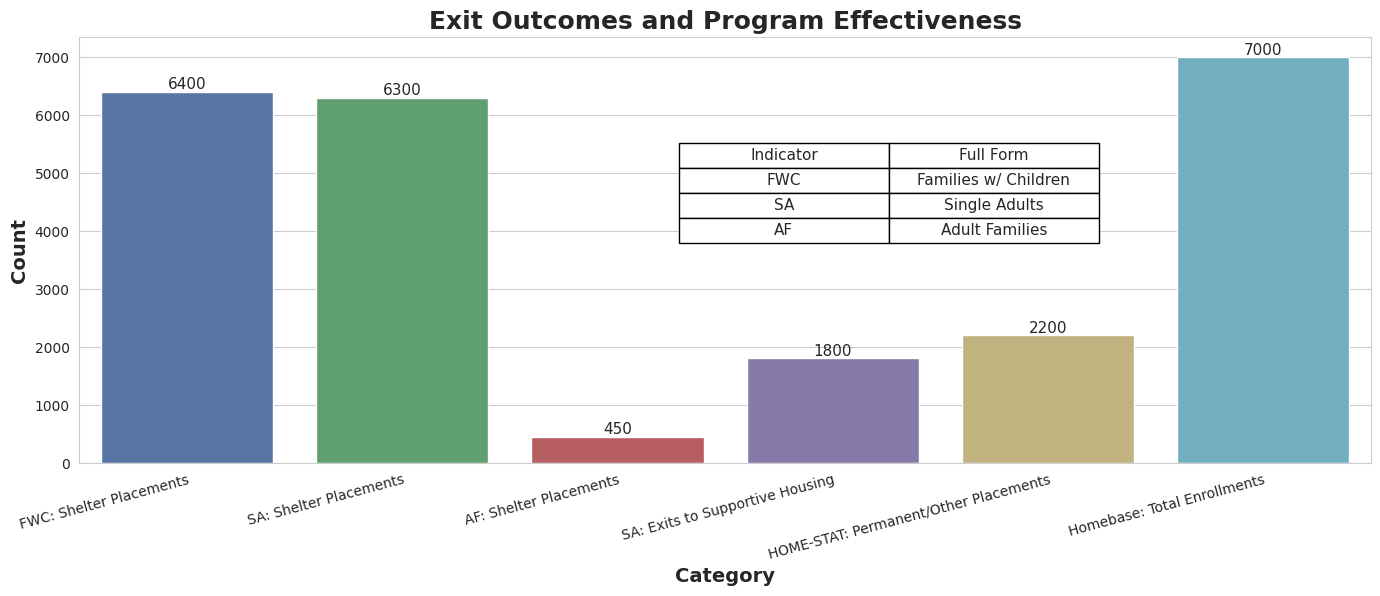

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
final_data = pd.DataFrame({
    'Category': [
        'FWC: Shelter Placements',
        'SA: Shelter Placements',
        'AF: Shelter Placements',
        'SA: Exits to Supportive Housing',
        'HOME-STAT: Permanent/Other Placements',
        'Homebase: Total Enrollments'
    ],
    'Value': [6400, 6300, 450, 1800, 2200, 7000]
})

# Key Indicator Table Data
table_data = [
    ['FWC', 'Families w/ Children'],
    ['SA', 'Single Adults'],
    ['AF', 'Adult Families']
]

# Color palette used in earlier chart
custom_colors = [
    '#4C72B0',  # FWC
    '#55A868',  # SA
    '#C44E52',  # AF
    '#8172B2',  # SA Exits
    '#CCB974',  # HOME-STAT
    '#64B5CD'   # Homebase
]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Barplot with custom colors
barplot = sns.barplot(data=final_data, x='Category', y='Value', ax=ax, palette=custom_colors)
ax.set_title('Exit Outcomes and Program Effectiveness', fontweight='bold', fontsize=18)
ax.set_ylabel('Count', fontweight='bold', fontsize=14)
ax.set_xlabel('Category', fontweight='bold', fontsize=14)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=15, ha='right', wrap=True)

# Add value labels on bars
for p in barplot.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11)

# Key Indicator Table Placement
table_ax = fig.add_axes([0.52, 0.57, 0.25, 0.2])
table_ax.axis('off')
indicator_table = table_ax.table(cellText=table_data,
                                  colLabels=['Indicator', 'Full Form'],
                                  loc='center', cellLoc='center')
indicator_table.auto_set_font_size(False)
indicator_table.set_fontsize(11)
indicator_table.scale(1.2, 1.5)

plt.tight_layout()
plt.show()

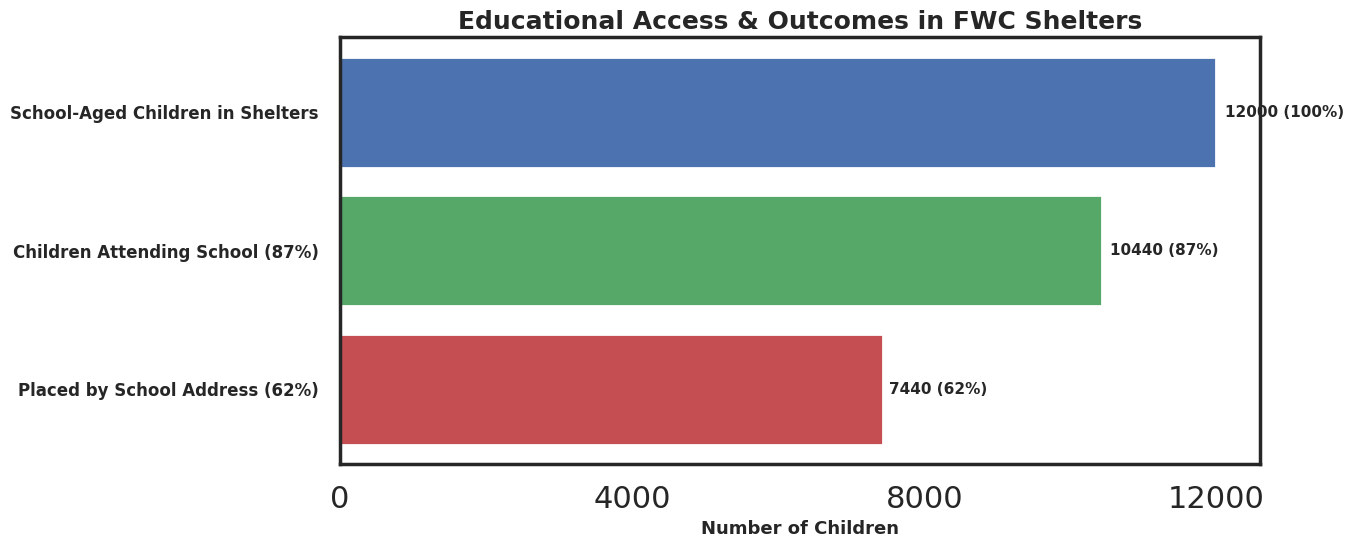

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
edu_metrics_numbers = pd.DataFrame({
    'Metric': [
        'School-Aged Children in Shelters',
        'Children Attending School (87%)',
        'Placed by School Address (62%)'
    ],
    'Value': [12000, 10440, 7440]
})

# Corresponding percentages for labels
percentages = [100, 87, 62]

# Custom poster colors (same as final chart version)
colors = ['#4C72B0', '#55A868', '#C44E52']  # Blue, Green, Red (poster palette)

# Plot
plt.figure(figsize=(14, 6))
bars = plt.barh(edu_metrics_numbers['Metric'], edu_metrics_numbers['Value'], color=colors)

# Value + percent labels
for bar, pct in zip(bars, percentages):
    width = bar.get_width()
    label = f'{int(width)} ({pct}%)'
    plt.text(width + (width * 0.01), bar.get_y() + bar.get_height() / 2,
             label, ha='left', va='center', fontweight='bold', fontsize=11)

# Style
plt.title('Educational Access & Outcomes in FWC Shelters', fontsize=18, fontweight='bold')
plt.xlabel('Number of Children', fontsize=13, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks([0, 4000, 8000, 12000])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

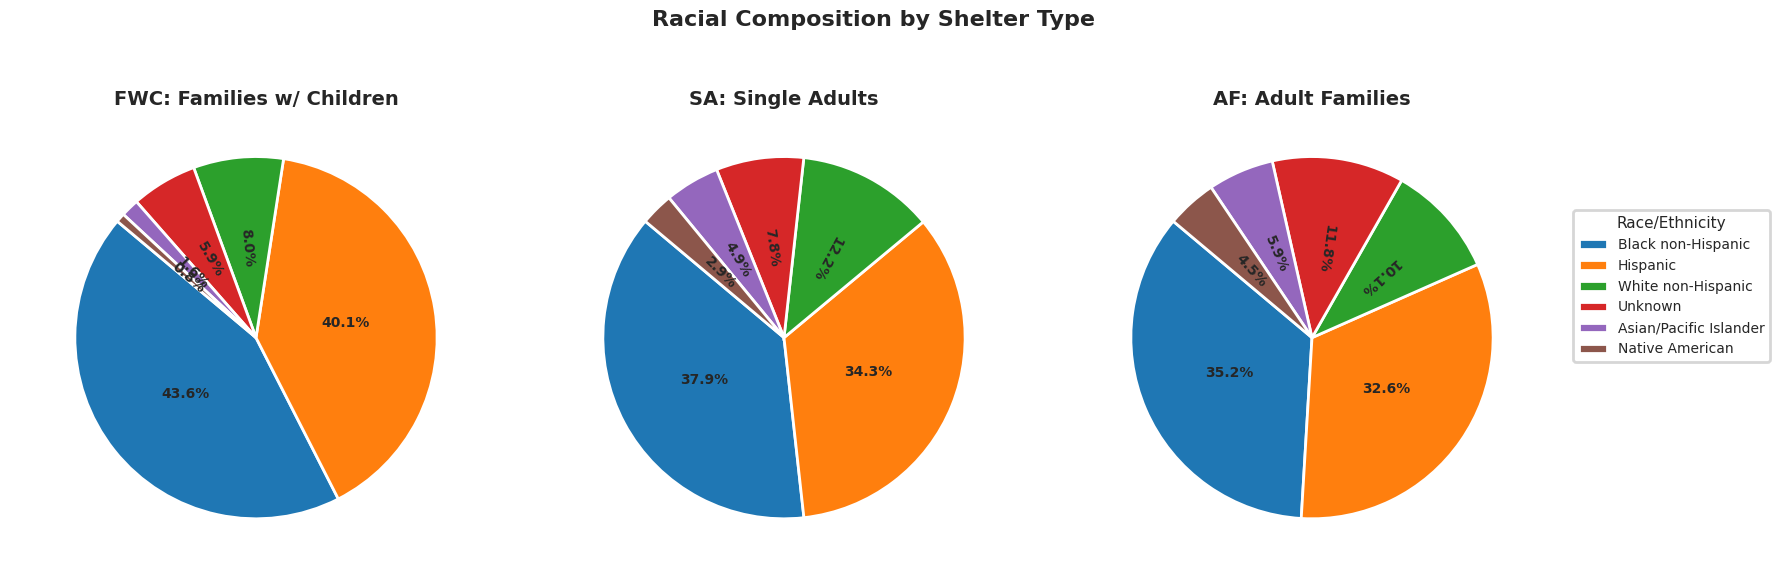

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Race labels and shelter type percentages
race_labels = [
    'Black non-Hispanic', 'Hispanic', 'White non-Hispanic',
    'Unknown', 'Asian/Pacific Islander', 'Native American'
]

race_df_percent = pd.DataFrame({
    'Race': race_labels,
    'FWC': [48.9, 44.9, 3.0, 2.2, 0.6, 0.3],
    'SA':  [46.5, 42.1, 5.0, 3.2, 2.0, 1.2],
    'AF':  [44.8, 41.5, 4.3, 5.0, 2.5, 1.9]
})

shelter_types = ['FWC', 'SA', 'AF']
titles = [
    'FWC: Families w/ Children',
    'SA: Single Adults',
    'AF: Adult Families'
]
horizontal_indices = [0, 1]  # Show horizontal % text for Black non-Hispanic & Hispanic

# Consistent color palette (one color per race label)
vibrant_colors = [
    '#1f77b4',  # Black non-Hispanic
    '#ff7f0e',  # Hispanic
    '#2ca02c',  # White non-Hispanic
    '#d62728',  # Unknown
    '#9467bd',  # Asian/Pacific Islander
    '#8c564b'   # Native American
]

# Exaggerate smaller values for label fit
def max_exaggerate_slices(values, threshold=10, factor=3.0):
    return [v * factor if v < threshold else v for v in values]

# Function for actual percent display
def make_autopct(values):
    def my_autopct(pct):
        return '{p:.1f}%'.format(p=pct)
    return my_autopct

# Create figure and pie charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, shelter in enumerate(shelter_types):
    raw_values = race_df_percent[shelter].values
    exaggerated_values = max_exaggerate_slices(raw_values)

    wedges, texts, autotexts = axs[i].pie(
        exaggerated_values,
        labels=None,
        autopct=make_autopct(raw_values),
        startangle=140,
        colors=vibrant_colors,  # Apply consistent colors
        pctdistance=0.5,
        textprops={'fontsize': 10, 'fontweight': 'bold'}
    )
    axs[i].set_title(titles[i], fontsize=14, fontweight='bold')
    axs[i].axis('equal')

    # Rotate % labels for alignment
    for idx, (text, wedge) in enumerate(zip(autotexts, wedges)):
        if idx in horizontal_indices:
            text.set_rotation(0)
        else:
            angle = (wedge.theta2 + wedge.theta1) / 2.
            rotation = angle if angle <= 180 else angle - 180
            text.set_rotation(rotation)
        text.set_ha('center')
        text.set_va('center')

# Add external legend with race labels
fig.legend(labels=race_labels, loc='center right', title='Race/Ethnicity', fontsize=10, title_fontsize=11)

plt.suptitle('Racial Composition by Shelter Type', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for legend
plt.show()